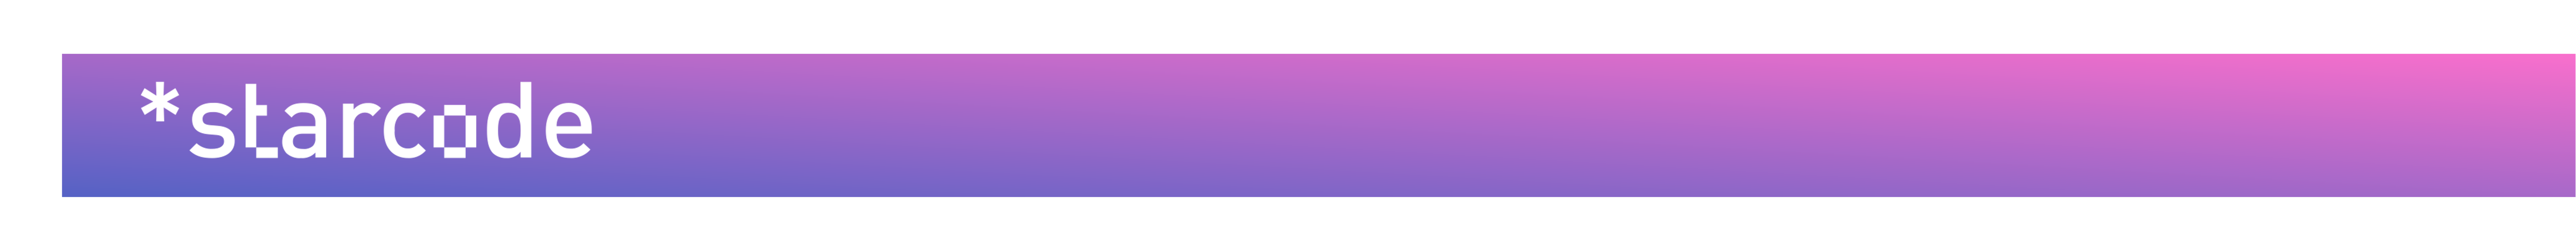

# Agenda



1.   Einführung

  a. Was ist Data Science

  b. Statistischer Primer: Mean

2.   Klimawandel analysieren mit Data Science

  a. Verstehen unseres Datensatzes(Daten=Wahrheit)

  b. Globales Klima (csv mit globalen Temperaturen)

  c. Länderebene

    i. Vertiefen des Wissens, Experimente

    ii. Aktiv Fragen beantworten

    iii. Spezialplot Globus

    iv. Min-Max, Ländervergleich
    
3. Zusammenfassung




Einführung: 
- Was ist Data Science? 
- Statistik im Handumdrehen

Klimawandel:

1. Unsere Klimadaten verstehen

2. Globales Klima analysieren

3. Klimdaten in den verschiedenen Ländern

# Einführung
 

## Was ist Data Science? 
Der Bereich der Datenwissenschaft befasst sich mit:

- der Analyse von (großen) Datenmengen, 
- der Identifizierung von Anomalien in den Daten, 
- sowie mit der Vorhersage von zukünftigen Ereignissen. 

Python ist eine guter Weg um mit Data Science anzufangen. Python alleine ist nicht so hilfreich. Deswegen müssen wir viele "librabries" importieren, wie zum Beispiel numpy und pandas. Das erlaubt uns, verschiedene Methoden, Algorithmen, usw. in einfacher Weise durchzuführen.

**FRAGE: Warum importieren wir verschiedene Sachen und was bedeutet das "as"?**

ANTWORT: Wenn man etwas importiert, muss man immer die "library" mit benutzen. Das heisst, dass es Abkürzungen gibt, die heutzutage Standard sind und viel kürzer zu schreiben sind. Wir verwenden diese später beim Programmieren.

In [ ]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

# Plotly
#import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import colorlover as cl
from plotly.subplots import make_subplots


#Download the Data
!pip install gdown
import gdown
files = {"continents2.csv": "https://drive.google.com/uc?export=download&id=1EaXdz5cmaZP-NxuyDNmOidKxFKY_FTIb",
         "GlobalTemperatures.csv": "https://drive.google.com/uc?id=1TOL3JDm75YfVAO9LkzCuCNvSonh2hi1_",
         "GlobalLandTemperaturesByState.csv": "https://drive.google.com/uc?id=1OvgM2Hz512x7JCgloZXr3BwQviAO0X0O",
         "GlobalLandTemperaturesByCountry.csv": "https://drive.google.com/uc?id=1A5ptCQlqJz4sQ2Y6WW2BchGMsrUKuHtW",
         #"GlobalLandTemperaturesByCity.csv": "https://drive.google.com/uc?id=17CV_8aVscRlscgtxVbk19I4hz0VjLdfS", 
         "cities.csv": "https://drive.google.com/uc?id=1W9VDIDuj60nMc2rD43KgbJCZlNnDCsOp", 
         "region.csv": "https://drive.google.com/uc?id=1WiO1OykbEnyQj4PJZP5943fdmtsfnpja", 
         "countries.csv": "https://drive.google.com/uc?id=1Z7LKYwEzDotiICO136Z8Wg4yT9_KWiFF"}
for file in files:
  gdown.download(files[file], file, quiet=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Warum benutzen wir nicht einfach Excel?**
- Pandas ist deutlich schneller als Excel, besonders wenn es um grössere Datenmengen geht. Viele der Aufgaben, die mit Pandas erledigt werden können, sind extrem einfach zu automatisieren, wodurch die Menge an mühsamen und sich wiederholenden Aufgaben, die immer wieder gemacht werden müssen, reduziert wird.
- Pandas können chaotische Datensätze "cleanen" und sie lesbar und relevant machen. Relevante und "saubere" Daten sind in Data Science sehr wichtig.

**Was kann man mit Pandas alles tun?**
Pandas erlaubt uns die folgenden Fragen und viele mehr zu beantworten:
- Gibt es eine Korrelation zwischen zwei oder mehr Spalten?
- Was ist ein Durchschnittswert?
- Was ist der Maximalwert?
- Was ist der kleinste Wert?

## Statistik im Handumdrehen
Als erstes wollen wir ein erstes Gefühl für Data Science bekommen. Dazu werden wir Körpergrößen statistisch analysieren. 

In [ ]:
körpergrößen = [165, 175, 187, 178, 166, 182, 172, 174, 192, 169, 177, 180, 167, 185, 228]

Min & Max

In [ ]:
print("Der kleinste Wert ist: ", np.min(körpergrößen))

Der kleinste Wert ist:  165


In [ ]:
print("Der größte Wert ist: ", np.max(körpergrößen))

Der größte Wert ist:  228


**Durchschnitt (Mean)**

In [ ]:
# Intuition 

summe = 0

for körpergröße in körpergrößen:
    summe += körpergröße

# or 
# summe = np.sum(körpergrößen)

körpergröße_durschnitt = summe / len(körpergrößen)
print(körpergröße_durschnitt)

179.8


In [ ]:
np.mean(körpergrößen)

179.8

**Median**
Der Median ist der Wert, der genau in der Mitte einer Datenreihe liegt, die nach der Größe geordnet ist. Aufgrund dieser zentralen Lage wird er auch Zentralwert genannt.

Der Median halbiert die Datenreihe, sodass eine Hälfte der Daten unterhalb und die andere Hälfte oberhalb des Medians in der geordneten Reihe liegt.

![image.png](attachment:6c0acb27-e994-450a-92ee-42d04ccbc429.png)

In [ ]:
# Intuition 

n = len(körpergrößen)

# Berechne Index des mittleren Wertes in der Datenreihe (wenn gerade Anzahl an Daten ist das der obere Wert)
index = n // 2

# Ungerade Anzahl an Daten
if n % 2:
    sorted(körpergrößen)[index]

# Gerade Anzahl an Daten: Mitte zwischen "den beiden" mittleren Werten 
else: 
    # Lesson: Indexing 
    inklusive = 1
    exclusive = 3
    körpergrößen[inklusive:exclusive]

    sum(sorted(körpergrößen)[index - 1:index + 1]) / 2

In [ ]:
np.median(körpergrößen)

177.0

**Wie ist der Unterschied zu verstehen?**

![image.png](attachment:fd8e27e8-5b9c-4f8e-935a-451d117ffaee.png)

**Aufgabe:**
Berechne max, min, mean und median des Alters deiner erweiterten Familie oder Freundesgruppe. Vergleicht und diskutiert eure Ergebnisse.

## Daten = Wahrheit ? 


**Was ist die Erhebung von Daten?**

Als Datenerhebung wird die Ermittlung, das Sammeln und das Auswerten von Daten bezeichnet, um bestimmte Ausprägungen von Merkmalen eines zu untersuchenden Forschungsgegenstandes durch statistische Darstellungen abzubilden.

Bei einer Erhebung müssen die Daten nicht erst erzeugt werden, wie bei einem Experiment, bei dem zuerst eine experimentelle Situation hergestellt werden muss, bevor die Daten gemessen werden können.

**Sind Daten immer objektiv?**

Eigentlich müsste man ja annehmen, dass gerade Daten besonders objektiv sind, aber tatsächlich kann es sehr schnell passieren, dass Daten verzerrt sind oder eine Voreingenommenheit widerspiegeln. Dabei kann sich eine Verzerrung oder Voreingenommenheit auf ganz unterschiedlichen Wegen in Daten einschleichen. So kann die Verzerrung schon bei der Erhebung der Daten entstehen, aber auch erst bei der Interpretation der Daten.

Ein Beispiel für eine Verzerrung bei der Erhebung der Daten wäre, wenn man eine bestimmte Gruppe von Menschen z.B. gar nicht befragt und somit dann natürlich auch nicht in den Daten abbildet. Das nennt sich dann Selection Bias gennant, was so viel bedeutet wie eine Verzerrung, die durch die Auswahl von z.B. Teilnehmer*innen einer Befragung entsteht.
 Ein anderes Beispiel für eine Voreingenommenheit von Daten bei der Interpretation der Daten nennt man Confirmation Bias. Hierbei geht es darum, dass die Verzerrung erst später, also der bei der Interpretation der Daten durch den Menschen entsteht. Der Grund für die Verzerrung ist dabei meistens, dass die Einstellungen oder Vorurteile des Menschen einfach auf dei Daten übertragen werden, damit diese dann quasi die eigenen Vorurteile bestätigen.

** Datensatz Intro **
- Wir haben für den Kurs einen Datensatz ausgesucht, aber eigentlich könnte man irgendein Datensatz verwenden. Aber um eine gute Wahl zu treffen muss man sich mit folgenden Fragen über den Datensatz befassen: Was wird gemessen?, wie wird es gemessen?, von wem?
- Wie könn(t)en wir damit Aussagen über den Klimawandel treffen: Durchschnittstemperatur, Min-/Max-temperatur, Max-Durchschnitt, Land&Sea, ... 

In [ ]:
# Data wird gelesen
global_temperatures = pd.read_csv("GlobalTemperatures.csv")
global_temperatures.head(-5)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3182,2015-03-01,6.740,0.060,12.659,0.096,0.894,0.079,15.193,0.061
3183,2015-04-01,9.313,0.088,15.224,0.137,3.402,0.147,15.962,0.061
3184,2015-05-01,12.312,0.081,18.181,0.117,6.313,0.153,16.774,0.058
3185,2015-06-01,14.505,0.068,20.364,0.133,8.627,0.168,17.390,0.057


# Klimawandel analysieren mit Data Science

## Globale Temperatur

In [ ]:
#Zunächst müssen wir einige Vorbereitungen treffen.
global_temperatures.dropna(axis = 0, inplace = True)
global_temperatures['Date'] = pd.to_datetime(global_temperatures.dt) # converted all dates to the same format

# Nun verwenden wir die Datums Spalte als einen Index 
# So wie in einem Lexikon die einzelne Buchstaben dir das finden von Wörtern erleichtert, 
# lässt uns ein Index leichter und effizienter Ergebnisse finden
global_temperatures.set_index("Date", inplace=True)
global_temperatures.drop(columns = ['dt'], axis = 1, inplace = True) # drop the dt column

# Für zukünftige Analysen werden wir nur mit Jahresdaten als Durchschnitt arbeiten 
#(weil Daten fehlen und Daten nicht konsistent sind).
yearly_global_temperatures = global_temperatures.groupby(by = global_temperatures.index.year)[['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty']].mean()

yearly_global_temperatures.head(5)

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
Date,,,,,,,,
1850,7.900667,0.876417,13.476667,2.394833,1.964333,1.571167,14.867167,0.308167
1851,8.178583,0.881917,13.081000,2.397250,2.203917,1.632417,14.991833,0.312083
1852,8.100167,0.918250,13.397333,2.619250,2.337000,1.382917,15.006500,0.316417
1853,8.041833,0.835000,13.886583,2.095083,1.892500,1.355583,14.955167,0.283833
1854,8.210500,0.825667,13.977417,1.783333,1.762167,1.357000,14.991000,0.276417


**Zusammenfassende Statistik 1850-2010**

Eine sehr einfache Zusammenfassung; wir haben insgesamt '166' Beobachtungen. Jetzt gehen wir auf Visualisierungen ein, um endlich ein paar Einblicke zu bekommen.

In [ ]:
# Einfache zusammenfassende Statistiken
yearly_global_temperatures[['LandAverageTemperature', 'LandMaxTemperature', 
       'LandMinTemperature', 'LandAndOceanAverageTemperature']].describe()

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
count,166.000000,166.000000,166.000000,166.000000
mean,8.571583,14.350601,2.743595,15.212566
std,0.473687,0.447741,0.614124,0.298629
min,7.558583,13.081000,1.525083,14.740083
25%,8.195708,14.055917,2.262562,14.991208
50%,8.540750,14.307708,2.734917,15.144208
75%,8.791250,14.539167,3.126833,15.379104
max,9.831000,15.572667,4.148833,16.058583


## Analyse der globalen Temperatur

Zunächst untersuchen wir, wie sich das Klima auf der gesamten Welt als ganzes verändert hat. Hierfür wollen wir zunächst die globale Durchschnittstemperatur darstellen.

In [ ]:
Jahre = yearly_global_temperatures.index
temperaturen_global = yearly_global_temperatures['LandAverageTemperature']

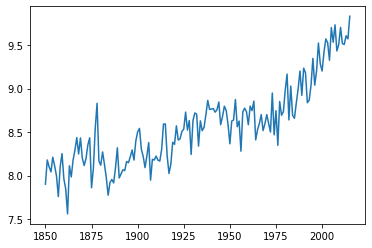

In [ ]:
# Der Begriff plt.plot(x,y) erstellt einen Graphen der Werte x unx y
plt.plot(Jahre, temperaturen_global)
# Um den Plot anzeigen zu lassen, verwenden wir plt.show()
plt.show()

Das sieht schonmal gut aus! Nur leider fehlt die Beschriftung. Wenn ihr nach plt.plot(x,y) den Befehl plt.suptitle("TITEL") verwendet, wird ein Titel über dem Plot angezeigt.

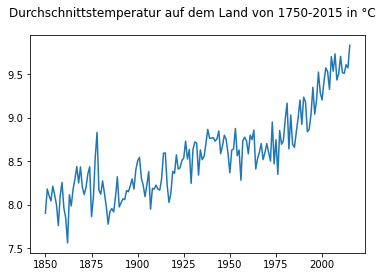

In [ ]:
# Hier erstellen wir den Plot
plt.plot(Jahre, temperaturen_global)

#Ergänze nun den Titel Durchschnittstemperatur auf dem Land von 1750-2015 in °C.
#Im Text über dieser Zelle erfährst du, wie das geht!
plt.suptitle("Durchschnittstemperatur auf dem Land von 1750-2015 in °C")

# Um den Plot anzeigen zu lassen, verwenden wir plt.show()
plt.show()

Nun wüssten wir noch gerne, wie sich die Temperatur im vergleich zum Durchschnitt entwickelt. Berechne zunächst den Durchschnitt der Temperatur.

In [ ]:
Durchschnitt_global = np.mean(temperaturen_global)

Nun verwenden wir den Begriff `plt.axhline(y)` um eine Linie auf der Höhe der Durchschnittstemperatur erstellt. Beachte, dass wir y durch die Durchschnittstemperatur erstezen müssen.

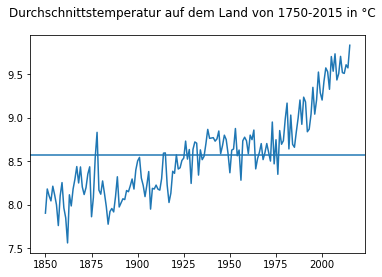

In [ ]:
# Hier erstellen wir den Plot
plt.plot(Jahre, temperaturen_global)
plt.suptitle("Durchschnittstemperatur auf dem Land von 1750-2015 in °C")

plt.axhline(Durchschnitt_global)

# Um den Plot anzeigen zu lassen, verwenden wir plt.show()
plt.show()

Toll! Leider erkennt man die durchgezogene Linie in gleicher Farbe nicht so gut. Wir können die Linie aber auch gestrichelt darstellen und in einer anderen Farbe.
Durch den Parameter `(linestyle="--")` erstellen wir eine gestrichelte Linie und durch den Parameter `(color="grey")` ändern wir die Farbe zu grau. Wir können auch beliebige andere Farben verwenden, jedoch müssen wir diese auf Englisch eingeben.

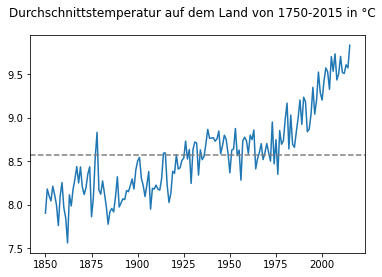

In [ ]:
# Hier erstellen wir den Plot
plt.plot(Jahre, temperaturen_global)
plt.suptitle("Durchschnittstemperatur auf dem Land von 1750-2015 in °C")

plt.axhline(Durchschnitt_global, linestyle="--", color="grey")

# Um den Plot anzeigen zu lassen, verwenden wir plt.show()
plt.show()

## Analyse auf Länderebene

### Plots auf Länderebene


**Lade Temperatur Daten für jedes Lan**d

In [ ]:
countries = pd.read_csv("countries.csv")
region = pd.read_csv("region.csv")
cities = pd.read_csv("cities.csv")


In [ ]:
countries.head()

,region,Country,year,AverageTemperature,AverageTemperatureUncertainty
0,Africa,Algeria,1825,17.642750,2.168750
1,Africa,Algeria,1826,17.461233,2.140183
2,Africa,Algeria,1827,17.456433,2.193283
3,Africa,Algeria,1828,17.902917,2.200283
4,Africa,Algeria,1829,17.311133,2.390317


**Plotten verschiedener Länder**

Jetzt wollen wir aber einzelne Länder betrachten, schließlich unterscheiden sich die Durchschnittstemperaturen von Land zu Land teilweise erheblich. Fangen wir damit an, die Temperaturen zweier Länder gleichzeitig darzustellen.

Zunächst müssen wir die Werte für einige Länder in Variablen speichern.

Falls ihr beim plotten von gewissen Ländern einen Fehler erhaltet, führt einmal Land=pad(Land) aus.

In [ ]:
def pad(x):
  n = Jahre.shape[0]
  k = x.shape[0]
  ret = np.zeros(n)
  ret[n-k:] = x
  return ret

In [ ]:
#In Europa interessieren wir uns für die Länder Deutschland, Österreich, Schweiz und Italien
Jahre       = countries[countries['Country'] == 'Germany']['year']
Deutschland = countries[countries['Country'] == 'Germany']['AverageTemperature']
Österreich  = countries[countries['Country'] == 'Austria']['AverageTemperature']
Schweiz     = countries[countries['Country'] == 'Switzerland']['AverageTemperature']
Italien     = countries[countries['Country'] == 'Italy']['AverageTemperature']

#Außerhalb Europas für die USA, Ghana und Australien
USA            = countries[countries['Country'] == 'United States']['AverageTemperature']
Ghana          = countries[countries['Country'] == 'Ghana']['AverageTemperature']
Ghana          = pad(Ghana)
Australien     = countries[countries['Country'] == 'Australia']['AverageTemperature']

Wir können natürlich auch viele andere Länder betrachten. Folgender Befehl zeigt uns alle Länder an, von denen wir Daten zur Verfügung haben. Wir können zu diesen Ländern Zeitreihen erstellen wie im Beispiel oben.

In [ ]:
countries.Country.unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Congo',
       'Congo (Democratic Republic Of The)', "Côte D'Ivoire", 'Djibouti',
       'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea Bissau', 'Kenya', 'Lesotho',
       'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mauritius', 'Morocco', 'Mozambique', 'Niger', 'Nigeria', 'Rwanda',
       'Senegal', 'Sierra Leone', 'Somalia', 'South Africa', 'Sudan',
       'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe',
       'Argentina', 'Bahamas', 'Bolivia', 'Brazil', 'Canada', 'Chile',
       'Colombia', 'Costa Rica', 'Cuba', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Guatemala', 'Guyana', 'Haiti', 'Honduras',
       'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru',
       'Puerto Rico', 'Suriname', 'United States', 'Uruguay', 'Venezuela',

**Aufgabe: Erstelle noch zwei weitere Zeitreihen für Länder deiner Wahl.**

In [ ]:
#Dein Code hier

Nun wollen wir aber Länder vergleichen. Beginnen wir damit, Deutschland und Italien zu vergleichen. Der Untenstehende Code zeigt nur die Daten von Deutschland an.

**Aufgabe: Füge noch Code hinzu, damit auch Italiens Temperaturen angezeigt werden. Füge außerdem eine passende Überschrift ein.**

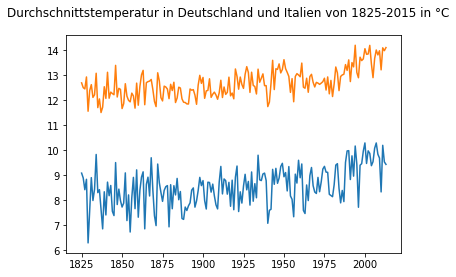

In [ ]:
plt.plot(Jahre, Deutschland)
### Dein Code hier
plt.plot(Jahre, Italien)
plt.suptitle("Durchschnittstemperatur in Deutschland und Italien von 1825-2015 in °C")
plt.show()

Super! Nur welche dieser Linien gehört zu Deutschland und welche Zu Italien? Vielleicht habt ihr euch schon gedacht, dass die obere Linie zu Italien gehört, da es in Italien meist wärmer ist. Wie können wir das aber im Graphen zeigen? Mit einer Legende. Hierfür müssen wir jedem der Linie ein Label geben und dann die Legende einfügen. Wir haben schon ein Label für Deutschland erstellt. Ergänze du eines für Italien!

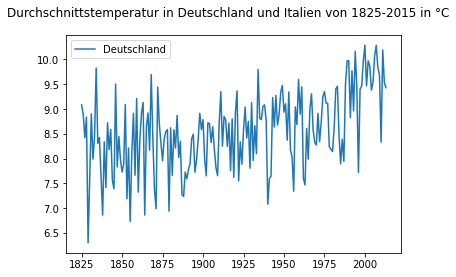

In [ ]:
#Wir fügen zu beiden Zeitreihen ein Label hinzu
plt.plot(Jahre, Deutschland, label="Deutschland")

### Dein Code hier
plt.suptitle("Durchschnittstemperatur in Deutschland und Italien von 1825-2015 in °C")
plt.legend()
plt.show()

Super! Wie wäre es jetzt, wenn wir noch die USA und Ghana mit in den Vergleich einbeziehen?
**Aufgabe: Füge noch Code hinzu, damit auch die USA und Österreich angezeigt werden. Vergiss nicht, die Labels zu ergänzen.**

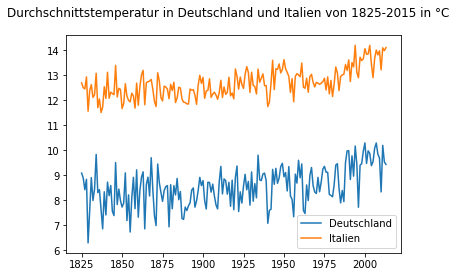

In [ ]:
#Wir fügen zu beiden Zeitreihen ein Label hinzu
plt.plot(Jahre, Deutschland, label="Deutschland")
plt.plot(Jahre, Italien, label="Italien")
### Dein Code hier
plt.suptitle("Durchschnittstemperatur in Deutschland und Italien von 1825-2015 in °C")
plt.legend()
plt.show()

**Aufgabe: Betrachte jetzt drei neue Länder deine Wahl und vergleiche deren Temperaturen.**

In [ ]:
#Dein Code Hier

Wir können uns auch die Durchschnittstemperaturen für einzelne Städte anzeigen lassen. Für welche Städte in Deutschland Daten im Datensatz erhalten sind seht ihr foglendermaßen: 

In [ ]:
cities = cities[cities['Country'] == 'Germany']
cities.City.unique()

array(['Aachen', 'Augsburg', 'Bergisch Gladbach', 'Berlin', 'Bielefeld',
       'Bochum', 'Bonn', 'Bottrop', 'Bremen', 'Bremerhaven', 'Brunswick',
       'Chemnitz', 'Cologne', 'Cottbus', 'Darmstadt', 'Dortmund',
       'Dresden', 'Duisburg', 'Düsseldorf', 'Erfurt', 'Erlangen', 'Essen',
       'Frankfurt', 'Freiburg', 'Fürth', 'Gelsenkirchen', 'Gera',
       'Göttingen', 'Hagen', 'Halle', 'Hamburg', 'Hamm', 'Hanover',
       'Heidelberg', 'Heilbronn', 'Herne', 'Hildesheim', 'Ingolstadt',
       'Karlsruhe', 'Kassel', 'Kiel', 'Koblenz', 'Krefeld', 'Leipzig',
       'Leverkusen', 'Ludwigshafen', 'Lübeck', 'Magdeburg', 'Mainz',
       'Mannheim', 'Moers', 'Munich', 'Mönchengladbach', 'Mülheim',
       'Münster', 'Neuss', 'Nuremberg', 'Oberhausen', 'Offenbach',
       'Oldenburg', 'Osnabrück', 'Paderborn', 'Pforzheim', 'Potsdam',
       'Ratisbon', 'Recklinghausen', 'Remscheid', 'Reutlingen', 'Rostock',
       'Saarbrücken', 'Salzgitter', 'Siegen', 'Solingen', 'Stuttgart',
       'Trier', 

**Aufgabe: Vergleiche Deutschalnd mit zwei Städten deiner Wahl** 

In [ ]:
#Dein Code hier

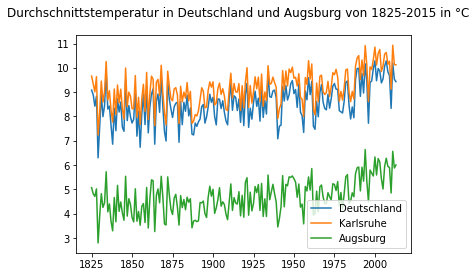

In [ ]:
# Beispiellösung: 
Jahre_Cities = cities[cities['City'] == 'Augsburg']['year']
Augsburg = cities[cities['City'] == 'Augsburg']['AverageTemperature']
Karlsruhe = cities[cities['City'] == 'Karlsruhe']['AverageTemperature']
plt.plot(Jahre, Deutschland, label="Deutschland")
plt.plot(Jahre_Cities, Karlsruhe, label="Karlsruhe")
plt.plot(Jahre_Cities, Augsburg, label="Augsburg")
plt.suptitle("Durchschnittstemperatur in Deutschland und Augsburg von 1825-2015 in °C")
plt.legend()
plt.show()

### Fragen auf Länderebene

Nun versuchen wir noch etwas mehr über die Daten zu erfahren. Zunächst betrachten wir die Durchschnittstemperaturen in verschiedenen Ländern. Hierfür verwenden wir das Kommando np.mean()

In [ ]:
Deutschland_Durchschnitt = np.mean(Deutschland)
#Ermittle außerdem die Durchschnittswerte für Italien, Österreich und die USA


Mit den Kommandos np.min() und np.max() ermitteln wir die höchsten Durchschnittstemperaturen.
**Aufgabe: Ermittle die höchsten und niedrigsten Durchschnittstemperaturen in drei Ländern deiner Wahl.**

In [ ]:
#Dein Code Hier

Nun wollen wir noch wissen, in welchen Jahren die höchsten und niedrigsten Temperaturen erreicht wurden. Hierfür verwenden wir die Kommandos np.argmin() und np.argmax()

In [ ]:
#Dein Code hier

## Interaktive Globus Graphik

Bisher haben wir die Temperaturen mit Liniendiagrammen visualisiert. Wir haben auch Länder mit eigenen Linien und Farben gezeichnet. Wenn wir nun aber eine Visualisierung erstellen möchten in welcher der Betrachter auf eigene Faust die Temperatur in verschiedenen Ländern erkunden kann, ist ein Liniendiagramm Bei 195 Ländern auf unserer Erde ungeignet. Wie wäre es denn mit einem virtuellen Globus, den man selbst mit der Maus drehen und erkunden kann? 

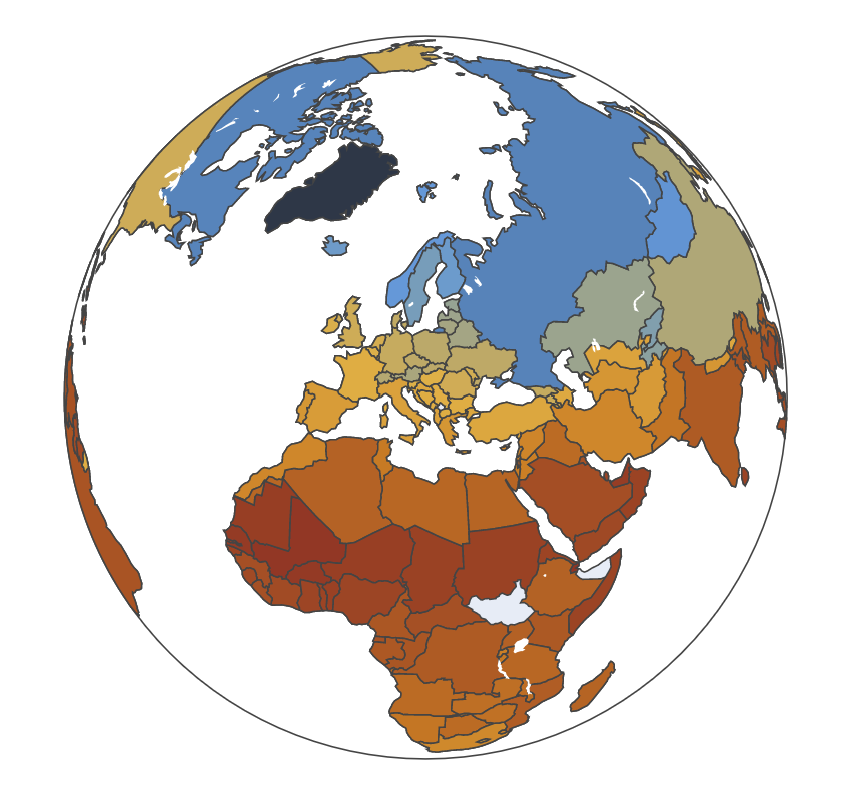

Auch für diese Visualisierung haben sich andere Menschen bereits Gedanken gemacht und sie für uns im Detail programmiert. Um das zu nutzen importieren wir eine weitere **Visualisierungs Bibliothek "Plotly"**. Genauer gesagt die Express Variante von Plotly, welche besonders schnell und einfach Visualisierungen erstellen lässt.

In [ ]:
import plotly.express as px

Nun müssen wir uns fragen: Wie genau sieht der Datensatz, welchen wir darstellen wollen, (tabelarisch) aus? 

In [ ]:
# TODO: evlt. gleiches csv von oben 
GlobalLandTemperaturesByCountry = pd.read_csv("GlobalLandTemperaturesByCountry.csv")
GlobalLandTemperaturesByCountry


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


Wir brauchen die Temperaturdaten für jedes Land. Aber diesmal ohne die Information des Datums. Dazu "**gruppieren**" wir die Zeilen aus der oberen Tabelle mit der ***groupby*** Funktion und ersetzen die ganzen Zeilen mit dem Durchschnittswert von allen einzelnen Monaten mit der ***mean*** Funktion.

In [ ]:
# Durchschnittstemperatur für jedes Land
Länder_Durchschnittstemperaturen = GlobalLandTemperaturesByCountry.groupby(by='Country', as_index=False).mean()
Länder_Durchschnittstemperaturen

,Country,AverageTemperature,AverageTemperatureUncertainty
0,Afghanistan,14.045007,0.930162
1,Africa,24.074203,0.395564
2,Albania,12.610646,1.524574
3,Algeria,22.985112,1.176241
4,American Samoa,26.611965,0.541258
...,...,...,...
238,Western Sahara,22.319818,1.155545
239,Yemen,26.253597,0.868881
240,Zambia,21.282956,0.568231
241,Zimbabwe,21.117547,0.556050


Um es nun visuell ansprechend zu machen, benutzen wir im nächsten Schritt die Plotly Bibliothek. Der komplizierte Name *Choropleth* ist der Begriff für die Art von Globus Visualisierung die wir erstellen. Das ultra coole ist, dass dies Choropleth Funktion Ländernamen erkennt und automatisch am korrekten geographischen Ort auf dem Globus darstellt! 

In [ ]:
fig = px.choropleth(
        # Als ersten Funktionsparameter übergeben wir unsere Tabellenwerte von oben
        Länder_Durchschnittstemperaturen,

        # Danach müssen wir erklären wie genau unsere Tabellenspalten aufgebaut sind 

        # Hier müssen wir den Namen unserer Tabellenspalte eintragen, in der die Ländernamen stehen
        locations = 'Country',
        # Hier legen wir fest, dass in dieser Zeile ganz ausgeschriebene Ländernamen stehen. Eine andere Option wären Abkürzungen wie USA
        locationmode = 'country names',
        # Die Farbe soll unsere berechnete Spalte "AverageTemperature" mit den Durchschnittstemperaturen darstellen
        color = 'AverageTemperature',
        # Die Projection lässt unseren "Blickwinkel" auf die Erde einstellen: orthographic erstellt einen runden Globus, ihr könnt aber auch mal 'natural earth' versuchen
        projection = 'orthographic', # 'natural earth'

        # Zuletzt wählen wir den Text der als Legende / Label für unsere Tabellenspalten angezeigt werden soll: Durchschnittstemperatur und Land
        labels = {
            'AverageTemperature': 'Durchschnittstemperatur in °C',
            'Country': 'Land'}, 
            # die Farbskala wollen wir von einem dunklem blau Ton (283747) bis zu einem dunklem rot Ton (A93226)
            color_continuous_scale=('#283747', '#2874A6', '#3498DB', '#F5B041', '#E67E22', '#A93226'),
        )

# Nachdem die Bibliothek nun alle Details kennt, können wir die Visualisierung anzeigen lassen und erkunden 
fig.show()

## Lineare Regression



Slide Deck: https://www.canva.com/design/DAFL6aMlW2Y/g_BXFZw5YEBrsu5fnTeq0g/edit?utm_content=DAFL6aMlW2Y&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton 

### Einführung

Um die ersten Programmierfunktion der Statistik (np.mean, np.max, etc.) kennenzulernen, hatten wir bereits einen Datensatz mit verschiedenen Körpergrößen verwendet. 
Jede Person hat jedoch noch mehr Informationen zu bieten. Z.b.das Alter.  

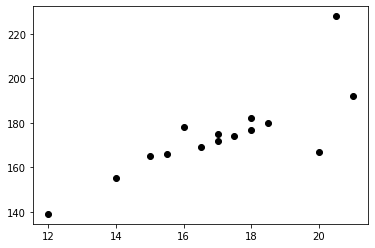

In [ ]:
körpergrößen = [165, 175, 139, 178, 166, 182, 172, 174, 192, 169, 177, 180, 167, 155, 228]
alter = [15, 17, 12, 16, 15.5, 18, 17, 17.5, 21, 16.5, 18, 18.5, 20, 14, 20.5]


plt.scatter(alter, körpergrößen, color="black")

In [ ]:
# Dieses Packet aus der library sklearn übernimmt die Berechnungen der linearen Regression für uns 
from sklearn.linear_model import LinearRegression

In [ ]:
alter

[15, 17, 12, 16, 15.5, 18, 17, 17.5, 21, 16.5, 18, 18.5, 20, 14, 20.5]

In [ ]:
# Weil es auch lineare Modelle mit mehr Variablen als nur dem Alter gibt, sieht die library sklear ein spezielles 
# Format für die X Variable vor. Das ist aber nicht so wichtig im Detail zu verstehen. Aber erkennst du den Unterschied zu oben?
alter = np.reshape(alter, (-1, 1))
alter

array([[15. ],
       [17. ],
       [12. ],
       [16. ],
       [15.5],
       [18. ],
       [17. ],
       [17.5],
       [21. ],
       [16.5],
       [18. ],
       [18.5],
       [20. ],
       [14. ],
       [20.5]])

Nun schauen wir uns das Erstellen einer **linearen Regression** an. 
Die folgenden **4 Schritte** sind letztendlich immer gleich und man muss nur die X und y Variablen und die Werte mit denen man vorhersagen will bzw. "predicten" will festlegen.

In [ ]:
# 1) Definiere die X 
X = alter
y = körpergrößen

# 2) Erstelle das lineare Model Object (aus der importierten library)
reg = LinearRegression()

# 3) Lasse das Model die Rechnungen ausführen, um das Model zu erstellen
reg.fit(X, y)

# 4) Berechne Vorhersagewerte anhand des Models 
model = reg.predict(alter)
model # das sind also die vorhergesagten Größen, die das Model anhand der gemessenen Daten berechnet 

array([161.46931408, 173.97472924, 142.71119134, 167.72202166,
       164.59566787, 180.22743682, 173.97472924, 177.10108303,
       198.98555957, 170.84837545, 180.22743682, 183.35379061,
       192.73285199, 155.2166065 , 195.85920578])

Lasst uns jetzt das lineare Model zusammen mit den originalen Messwerten visualisieren! 

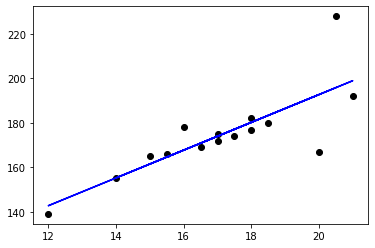

In [ ]:
# originale Messwerte in einem "Scatterplot"
plt.scatter(X, y, color='k', label="Messwerte")

# berechnete Gerade der linearen Regression
plt.plot(X, model, color='b', label="Lineares Model")

plt.show()

### Klimaforscherinnen im Einsatz


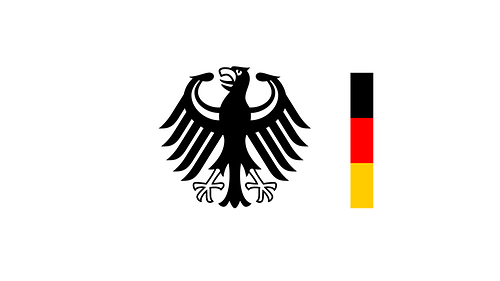

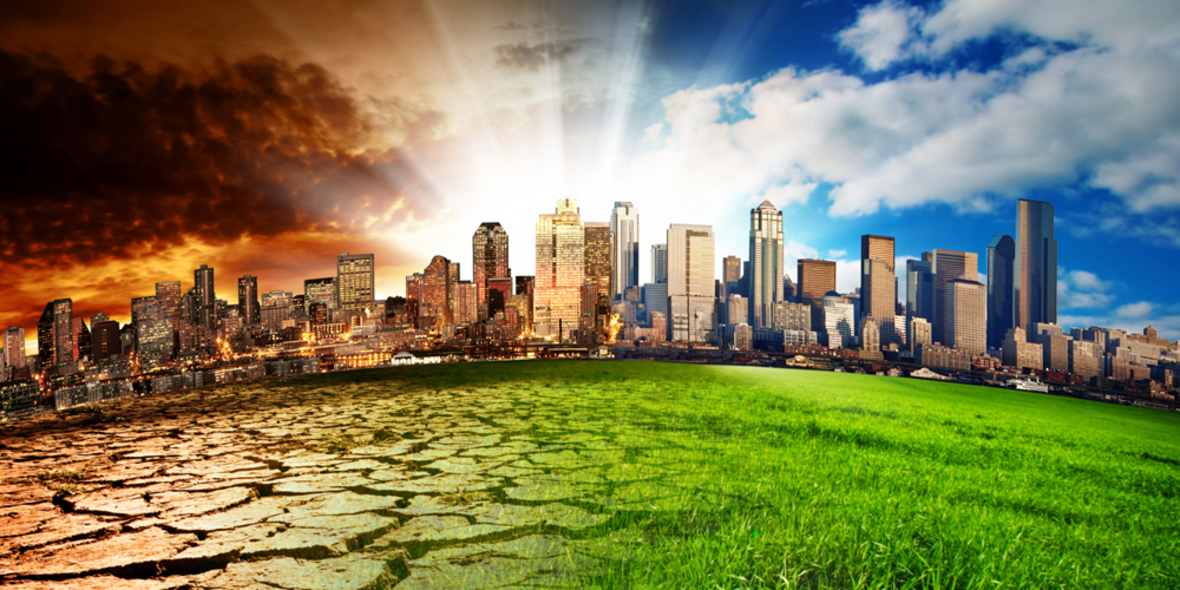

In [ ]:
# Da wir im Auftrag der Bundesregierung arbeiten, filtern wir uns zunächst die Daten von Deutschland
DE = countries[countries.Country == "Germany"]
DE

,region,Country,year,AverageTemperature,AverageTemperatureUncertainty
21707,Europe,Germany,1825,9.082843,2.273715
21708,Europe,Germany,1826,8.888949,2.193372
21709,Europe,Germany,1827,8.420222,2.224292
21710,Europe,Germany,1828,8.835965,2.363858
21711,Europe,Germany,1829,6.295750,2.749803
...,...,...,...,...,...
21891,Europe,Germany,2009,9.684022,0.249098
21892,Europe,Germany,2010,8.331975,0.235006
21893,Europe,Germany,2011,10.192977,0.254679
21894,Europe,Germany,2012,9.530550,0.290182


FRAGE: Was ist die Durchschnittstemperatur der vorindustriellen Zeit (bis 

---

einschließlich 1949) in Deutschland?

---



In [ ]:
def linear_regression(X_values, y_values):
  loss = np.sum(np.square(X_values,y_values))
  a, b = sp.optimize.minimize(...)

  return params

In [ ]:
# Wenn ihr wollt könnt ihr diese Variable zum Filtern der Zeilen verwenden (statt öfter 1950 einzutippen)
indust_Zeit_Grenze = 1950 

In [ ]:
### Dein Code hier

# vorindust_durchschnitt = # dein Code hier 

In [ ]:
#@title Lösung

vorindust_durchschnitt = DE[DE.year < indust_Zeit_Grenze]['AverageTemperature'].mean()

# wir runden das Ergebnis auf 3 Nachkommastellen
np.round(vorindust_durchschnitt, 3)

8.323

Nun haben wir den Vergleichswert, auf den sich das 2 Grad Ziel bezieht. 

Als nächstes müssen wir zwei Modelle mit Hilfe von linearer Regression erstellen. Mit diesen Modellen können wir dann vorhersagen, wie sich die Temperatur in den kommenden Jahren verhalten wird. Und letztendlich nach wie vielen Jahren die Temperatur um mehr als 2 Grad steigen wird.

In [ ]:
### Dein Code hier

# # Vorindustrielle Zeit 

# X_vorindust = DE[DE.year < indust_Zeit_Grenze] # Dein Code hier
# y_vorindust = DE[DE.year < indust_Zeit_Grenze] # Dein Code hier

# reg_vorindust = LinearRegression()

# # berechne / "fitte" das Model 
# # Dein Code hier ... 

# # erstelle eine Vorhersage 
# vorindust_model = # Dein Code hier



# # Industrielle Zeit 

# X_indust = DE[DE.year > indust_Zeit_Grenze] # Dein Code hier
# y_indust = # Dein Code hier 

# reg_indust = LinearRegression()

# # berechne / "fitte" das Model 
# # Dein Code hier ... 

# # erstelle eine Vorhersage
# indust_model = 


In [ ]:
#@title Lösung

# Wir unterscheiden zunächst die zwei Szenarien und erstellen das lineare Model

indust_Zeit_Grenze = 1950 
Jahreszahlen_bis_2100 = np.arange(1825, 2100).reshape(-1,1)

# Vorindustrielle Zeit 
X_vorindust = DE[DE.year < indust_Zeit_Grenze][['year']].values
y_vorindust = DE[DE.year < indust_Zeit_Grenze]['AverageTemperature'].values
reg_vorindust = LinearRegression()
reg_vorindust.fit(X_vorindust, y_vorindust)
#vorindust_model = reg_vorindust.predict(X_vorindust)
vorindust_model = reg_vorindust.predict(Jahreszahlen_bis_2100)


# Industrielle Zeit 
X_indust = DE[DE.year > indust_Zeit_Grenze][['year']].values
y_indust = DE[DE.year > indust_Zeit_Grenze]['AverageTemperature'].values
reg_indust = LinearRegression()
reg_indust.fit(X_indust, y_indust)
#indust_model = reg_indust.predict(X_indust)
indust_model = reg_indust.predict(Jahreszahlen_bis_2100)


# Gesamter Zeitraum 
X_gesamt = DE[['year']].values
y_gesamt = DE['AverageTemperature'].values


In [ ]:
#@title Lösung

# Ergebnisse visuell darstellen 

plt.figure(figsize=(9,5))

plt.scatter(X_gesamt, y_gesamt, color='k', label="Messwerte")

# vorindustrielle Gerade 
# plt.plot(X_vorindust, vorindust_model, color='b', label="Vorindustriell")
plt.plot(Jahreszahlen_bis_2100, vorindust_model, color='b', label="Vorindustriell")

# industrielle Gerade 
# plt.plot(X_indust, indust_model, color='r', label="Industriell")
plt.plot(Jahreszahlen_bis_2100, indust_model, color='r', label="Industriell")

# Linie: vorindustrieller Durchschnitt
plt.axhline(y=vorindust_durchschnitt, xmin=0, xmax=1, linestyle='--', label="Vergleichswert")

# Linie: 2-Grad-Ziel 
plt.axhline(y=vorindust_durchschnitt + 2, xmin=0, xmax=1, color="red", linestyle='--', label="2-Grad-Ziel")

# Beschriftungen 
plt.suptitle("Szenarien des 2-Grad-Ziels: " +  str(np.round(vorindust_durchschnitt+2, 3)))
plt.legend()
# plt.ylabel("Jahrestemperatur in °C") #fix...
plt.show()

In [ ]:
# TODO (Lin Alg Solver? per Hand auf Papier?)
# Schnittpunkt berechnen: wann wird das 2-Grad-Ziel bereits (vor 2100) erreicht? 

reg_indust.predict([[2040]])

array([10.32962276])

OPTIONAL: Welcher durchschnittliche Temperaturanstieg (Steigung der Geraden) wäre notwendig, um erst (wie geplant) im Jahr 2100 das 2-Grad-Ziel zu erreichen? 

In [ ]:
### Deine Lösung hier 



In [ ]:
### Lösung 

# TBD + evlt. Frage nachschärfen 

# Zusammenfassung

In [ ]:
# 1 Was haben wir über Statistik gelernt
# 2. Was haben wir für Python gelernt
# 3. Was brauchen wir noch, um bessere Aussagen zu treffen? (i.e. was haben wir NICHT gelernt)